<b>NAMA : Alif Muhamad Hafidz

<b>NIM : 09011281722044

<b>Kelas : SK5B

<b>MK : AI

<b>Dosen Pengampuh : Prof. Dr. Ir. Siti Nurmaini, M.T.

<b>Heart Disease Prediction With ANN


# Library yang dipakai


#### Numpy  
Modul ini berfungsi untuk melakukan beberapa fungsi matematika seperti array, dan matriks. Pada program ini numpy digunakan untuk generate array untuk membuat grafik confusion matriks.

#### Pandas  
Modul ini akan digunakan untuk Load Dataset.

#### Seaborn

Modul ini digunakan untuk plot grafik distribusi nilai dari Class (output), modul ini berbasis matplotlib.

#### Sklearn 

Modul ini digunakan untuk mengolah data Machine Learning seperti preprocessing.

#### Keras 

Modul ini digunakan untuk membuat, menambah, dan mengevaluasi model neural network.

#### Matplotlib 
Modul ini digunakan untuk mencetak grafik pada beberapa event seperti grafik distribusi variabel, grafik confusion matrix dan grafik akurasi.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


Link Dataset = https://www.mldata.io/dataset-details/heart_disease/
### Dataset

### Fitur/input = 13

### Label/Output = 1



## INPUT Data Set

In [2]:
dataset = pd.read_csv("heart_disease_dataset.csv")

In [3]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


## Pemisahan antara Fitur dan Label
    

Fitur dipisahkan dari kolom 1 sampai 13 sehingga kolom ke 14 tidak saya ambil karena kolom ke 14 adalah Output 

In [4]:
Fitur = dataset.iloc[:,0:13].values
Label = dataset.iloc[:,13].values


Isi data pada Fitur

In [5]:
Fitur

array([[ 6.3e+01,  1.0e+00,  1.0e+00, ...,  3.0e+00,  0.0e+00,  6.0e+00],
       [ 6.7e+01,  1.0e+00,  4.0e+00, ...,  2.0e+00,  3.0e+00,  3.0e+00],
       [ 6.7e+01,  1.0e+00,  4.0e+00, ...,  2.0e+00,  2.0e+00,  7.0e+00],
       ...,
       [ 5.7e+01,  1.0e+00,  4.0e+00, ...,  2.0e+00,  1.0e+00,  7.0e+00],
       [ 5.7e+01,  0.0e+00,  2.0e+00, ...,  2.0e+00,  1.0e+00,  3.0e+00],
       [ 3.8e+01,  1.0e+00,  3.0e+00, ...,  1.0e+00, -1.0e+05,  3.0e+00]])

Isi data pada Label

In [6]:
Label

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

## Preprocessing
Pada proses preprocessing ini, kita akan memproses nilai Fitur kedalam jarak atau perbandingan yang berdekatan, supaya hasil training bisa maksimal, banyak metode dalam process preprocessing ini, kali ini akan metode PreProcessing yang digunkan adalah metode MinMaxScaler. 

In [7]:
scaler = MinMaxScaler()
data = scaler.fit_transform(Fitur)

## Splitting Data Testing dan Data Training

Data di Split menjadi 20% testing dan 80% training dan data dipilih secara acak.

In [8]:
data_training, data_testing, target_training, target_testing = train_test_split(data, Label, test_size=0.2, random_state=42)

# Model ANN

Disini digunakan model Sequential(). 
1. Input layer -> Layer pertama terbentuk dari 13 layer Neural sesuai fitur dengan menggunakan activation relu.
2. Hidden Layer pertama -> 60 units Neural Network dengan menggunakan activation relu.
3. Output layer -> 1 unit Neural Network dengan menggunakan activation sigmoid.

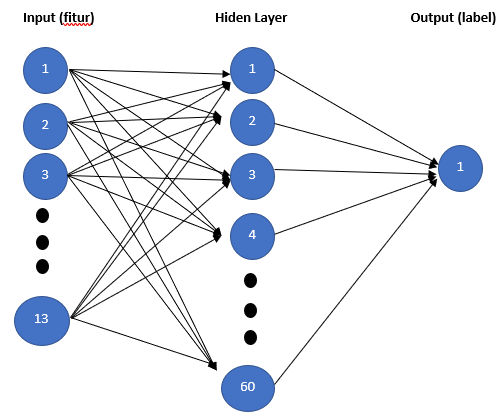

In [9]:
model = Sequential()
model.add(Dense(60, input_dim=13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile Model

Model Dicompile dengan Optimizer Adam dengan fungsi loss Binary Crossentropy

compile() berfungsi mengembalikan objek kode Python dari sumber (string normal, string byte, atau objek). Dalam hal ini menggunakan optimizer adam dan categorical loss yaitu binary crossentropy.

In [10]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Training model dengan data train

In [11]:
validasi = model.fit(data_training,target_training, validation_data=(data_testing,target_testing), epochs=70)


Train on 242 samples, validate on 61 samples
Epoch 1/70
242/242 [==============================] - 0s 664us/step - loss: 0.7051 - accuracy: 0.4008 - val_loss: 0.6986 - val_accuracy: 0.4426
Epoch 2/70
242/242 [==============================] - 0s 54us/step - loss: 0.6846 - accuracy: 0.5826 - val_loss: 0.6788 - val_accuracy: 0.5738
Epoch 3/70
242/242 [==============================] - 0s 70us/step - loss: 0.6676 - accuracy: 0.6942 - val_loss: 0.6624 - val_accuracy: 0.6721
Epoch 4/70
242/242 [==============================] - 0s 70us/step - loss: 0.6496 - accuracy: 0.7314 - val_loss: 0.6439 - val_accuracy: 0.7541
Epoch 5/70
242/242 [==============================] - 0s 70us/step - loss: 0.6345 - accuracy: 0.7769 - val_loss: 0.6244 - val_accuracy: 0.8033
Epoch 6/70
242/242 [==============================] - 0s 74us/step - loss: 0.6194 - accuracy: 0.7975 - val_loss: 0.6069 - val_accuracy: 0.8197
Epoch 7/70
242/242 [==============================] - 0s 70us/step - loss: 0.6047 - accuracy: 0

## Hasil Akurasi

In [12]:
scores = model.evaluate(data_testing, target_testing)
print("Akurasi data Testing = %.2f%%" % (scores[1]*100))

61/61 [==============================] - 0s 65us/step
Akurasi data Testing = 83.61%


## Training and Testing Accuracy 

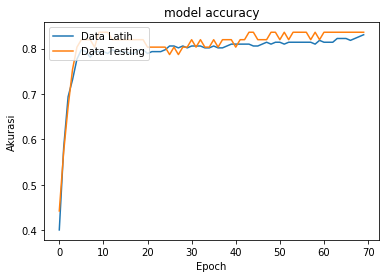

In [13]:
plt.plot(validasi.history['accuracy'])
plt.plot(validasi.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

## Training and Testing Loss

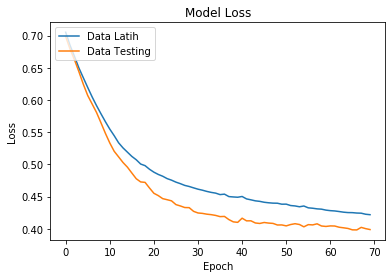

In [14]:
plt.plot(validasi.history['loss'])
plt.plot(validasi.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

## Prediction Model

In [15]:
prediction = model.predict_classes(data_testing)

## Evaluasi Model dengan Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_testing, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
print ("Confussion matriks:\n",cm)
print ("Jumlah True Positive: ", tp)
print ("Jumlah True Negative: ", tn)
print ("Jumlah False Positive: ", fp)
print ("Jumlah False Negative: ", fn)

Confussion matriks:
 [[25  4]
 [ 6 26]]
Jumlah True Positive:  25
Jumlah True Negative:  26
Jumlah False Positive:  4
Jumlah False Negative:  6


## Akurasi 

In [17]:
akurasi = (tn+tp) / (tp+tn+fp+fn)
print("Hasil Akurasi = ", akurasi)

Hasil Akurasi =  0.8360655737704918


## Precision

In [18]:
precision = tp / ( fp + tp)
print("Hasil Precision = ", precision)

Hasil Precision =  0.8620689655172413


# Recall

In [19]:
recall = tp/(fn+tp)
print("Hasil Recall = ",recall)

Hasil Recall =  0.8064516129032258


## F1

In [20]:
f1=(2*precision*recall)/ (precision+recall)
print("Hasil F1 = ",f1)

Hasil F1 =  0.8333333333333334
